<a href="https://colab.research.google.com/github/MihauEM/Projekt-Sieci-Neuronowe/blob/main/Projekt_Sieci_Neuronowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import keras
from keras.datasets import mnist      
from keras.models import Sequential   
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D     
from tensorflow.keras.utils import to_categorical

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

print('Liczba danych treningowych:', x_train.shape[0])
print('Liczba danych testowych:', x_test.shape[0])
print('Rozmiar pojedynczego obrazka:', x_train[0].shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)
Liczba danych treningowych: 60000
Liczba danych testowych: 10000
Rozmiar pojedynczego obrazka: (28, 28)


(-0.5, 27.5, 27.5, -0.5)

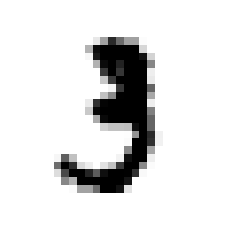

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[10], cmap='Greys')
plt.axis('off')

In [6]:
print(keras.backend.image_data_format())

img_rows, img_cols = 28, 28
if keras.backend.image_data_format() == 'channel_first':
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
  x_test = x_test.reshape(x_test.shape[0],1, img_rows, img_cols)
  input_shape = (1, img_rows, img_cols)
else:
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
  input_shape = (img_rows, img_cols, 1)

print(input_shape)

channels_last
(28, 28, 1)


In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [8]:
print(y_train[1:20])

[0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [9]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [10]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
model = Sequential() 
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28, 28, 1)))   #pierwsza warstwa konwolucji musi miec rozmiar
model.add(Conv2D(filters=64,kernel_size=(3,3), activation='relu'))     
model.add(MaxPooling2D(pool_size=(2,2)))         
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))    #wartstwa ukryta gęsta - trzeba podać liczbę neuronów warstwy
model.add(Dense(units=10, activation='softmax'))  #warstwa wyjściowa, ma 10 neuronów bo 10 klas. softmax bo chcemy dostać prawdopodobieństwa



In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [13]:
model.compile(optimizer='adadelta',           #kompilacja modelu, wykorzystanie optymalizatora adadelta
              loss='categorical_crossentropy',  #funkcja celu
              metrics=['accuracy'])             #metryka dokładności

In [14]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [16]:
history = model.fit(x_train, y_train, batch_size = 32, epochs=10, validation_data=(x_test, y_test))
#batch size - rozmiar danych w jednej iteracji - liczba po której wagi zostaną zaktualizowane


Epoch 1/10
1875/1875 [==============================] - 115s 61ms/step - loss: 2.1379 - accuracy: 0.4712 - val_loss: 1.9177 - val_accuracy: 0.7251
Epoch 2/10
1875/1875 [==============================] - 115s 61ms/step - loss: 1.5533 - accuracy: 0.7457 - val_loss: 1.1333 - val_accuracy: 0.7950
Epoch 3/10
1875/1875 [==============================] - 118s 63ms/step - loss: 0.8854 - accuracy: 0.8096 - val_loss: 0.6705 - val_accuracy: 0.8472
Epoch 4/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.6000 - accuracy: 0.8482 - val_loss: 0.5087 - val_accuracy: 0.8697
Epoch 5/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.4881 - accuracy: 0.8686 - val_loss: 0.4369 - val_accuracy: 0.8835
Epoch 6/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.4313 - accuracy: 0.8803 - val_loss: 0.3950 - val_accuracy: 0.8921
Epoch 7/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.3966 - accuracy: 0.8880 - val_loss: 0

In [18]:
history.history

{'accuracy': [0.4711500108242035,
  0.7456833124160767,
  0.8096333146095276,
  0.8482000231742859,
  0.8685500025749207,
  0.8803499937057495,
  0.8879666924476624,
  0.8936333060264587,
  0.8984166383743286,
  0.9016500115394592],
 'loss': [2.1379339694976807,
  1.5532865524291992,
  0.8853768706321716,
  0.5999568104743958,
  0.4880874752998352,
  0.43126165866851807,
  0.39662793278694153,
  0.37295761704444885,
  0.35543742775917053,
  0.3417539596557617],
 'val_accuracy': [0.7250999808311462,
  0.7950000166893005,
  0.8471999764442444,
  0.869700014591217,
  0.8834999799728394,
  0.8920999765396118,
  0.8978999853134155,
  0.9039999842643738,
  0.9070000052452087,
  0.9093000292778015],
 'val_loss': [1.9176511764526367,
  1.133347749710083,
  0.6705285906791687,
  0.5086503028869629,
  0.4368917942047119,
  0.39501893520355225,
  0.3688797056674957,
  0.35023510456085205,
  0.3344409167766571,
  0.32318177819252014]}

In [19]:
def make_accuracy_plot(history):
  
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(10, 8))
    plt.plot(epochs, acc, label='Dokładność trenowania', marker='o')
    plt.plot(epochs, val_acc, label='Dokładność walidacji', marker='o')
    plt.legend()
    plt.title('Dokładność trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Dokładność')
    plt.show()

def make_loss_plot(history):
  
    loss, val_loss = history.history['loss'], history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(10, 8))
    plt.plot(epochs, loss, label='Strata trenowania', marker='o')
    plt.plot(epochs, val_loss, label='Strata walidacji', marker='o')
    plt.legend()
    plt.title('Strata trenowania i walidacji')
    plt.xlabel('Epoki')
    plt.ylabel('Strata')
    plt.show()
    

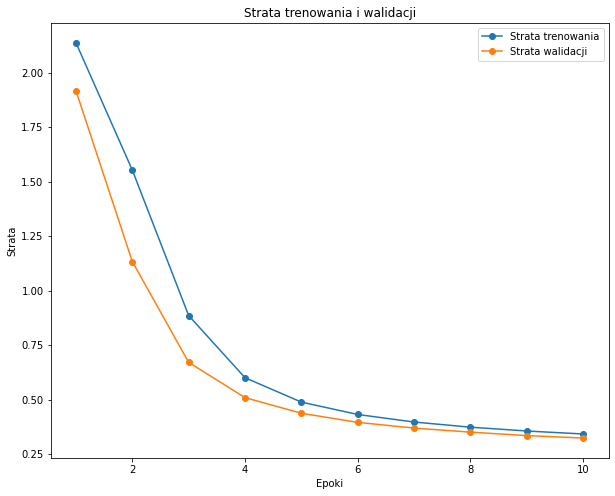

In [20]:
make_loss_plot(history)

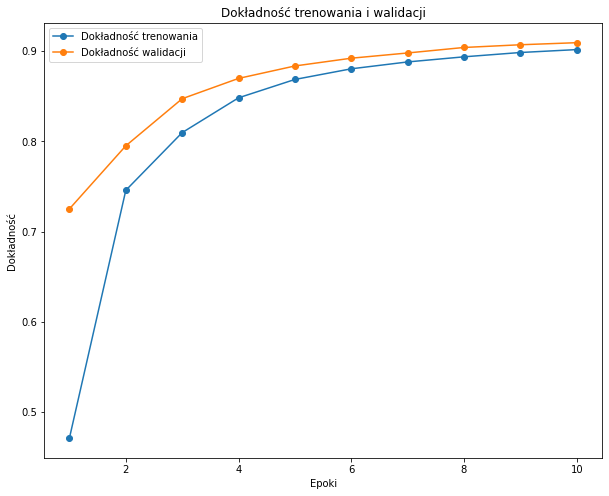

In [21]:
make_accuracy_plot(history)